In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df3 = pd.read_csv("LPOINT_BIG_COMP_03_COP_U.csv", sep=',')
df3

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


In [3]:
df3[(df3['cust']=='M001353506')&(df3['cop_c']=='D01')].sort_values(by = 'de_dt')

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
43739,M001353506,21020211D011815270,D01,D010418,1,20210202,20210202,11,18000
168113,M001353506,21051209D011549506,D01,D010418,1,20210512,20210512,9,4000
43737,M001353506,21061310D012813530,D01,D010324,1,20210613,20210613,10,12600
168109,M001353506,21062721D014067532,D01,D010841,1,20210627,20210627,21,6000
168111,M001353506,21091315D010747708,D01,D010418,1,20210913,20210913,15,4000
168112,M001353506,21091415D015127494,D01,D010418,1,20210914,20210914,15,2000
168110,M001353506,21123115D015814426,D01,D010265,1,20211231,20211231,15,18400


In [4]:
df3.isnull().sum()

cust        0
rct_no      0
cop_c       0
br_c       55
chnl_dv     0
de_dt       0
vst_dt      0
de_hr       0
buy_am      0
dtype: int64

In [5]:
df3.groupby(df3['cust']).size().sort_values()
# 여러 제휴사를 사용하는 고객

cust
M000034966      1
M404293374      1
M404275555      1
M403651862      1
M403299188      1
             ... 
M678207187     98
M710368459    115
M724456397    123
M295053802    130
M223630342    261
Length: 21769, dtype: int64

In [6]:
print('제휴사')
df3.groupby(df3['cop_c']).size()
# F&B 제휴 가장 많음

제휴사


cop_c
B01      8103
C01     48323
C02     30258
D01    112232
D02     43134
E01      6254
dtype: int64

In [7]:
print('점포')
df3.groupby(df3['br_c']).size().sort_values()

점포


br_c
E010020        1
D020005        1
D020178        1
D020180        1
D020082        1
           ...  
C010014     2021
C020004     2363
C010011     5227
E010001     5724
C020002    26171
Length: 2029, dtype: int64

이용시간


<AxesSubplot:xlabel='de_hr'>

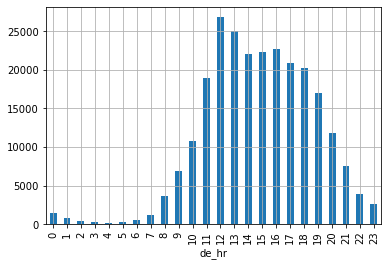

In [8]:
print('이용시간')
df3_time = df3.groupby(df3['de_hr']).size()
df3_time.plot(kind='bar', grid=True)

In [9]:
cust_df = pd.DataFrame(df3.groupby(df3['cust']).sum())
print('고객 별 총 이용 금액 (오름차순)\n', cust_df['buy_am'].sort_values(), '\n')

고객 별 총 이용 금액 (오름차순)
 cust
M694792358         500
M079440606         700
M487664884         700
M984043972         898
M413697357        1000
                ...   
M414456394    23765600
M439502359    45198170
M034936927    47020300
M867765456    60628750
M481734389    78419611
Name: buy_am, Length: 21769, dtype: int64 



In [10]:
df1 = pd.read_csv("LPOINT_BIG_COMP_01_DEMO.csv", sep=',')
df2 = pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv', sep=',')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df13 = pd.merge(df1, df3, left_on = 'cust', right_on = 'cust', how = 'inner')
df13

,cust,ma_fem_dv,ages,zon_hlv,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M000034966,여성,40대,Z07,21103009D010634285,D01,D011011,1,20211030,20211030,9,3900
1,M000059535,여성,30대,Z12,21030317C012142421,C01,C010085,2,20210303,20210305,17,46000
2,M000136117,여성,30대,Z11,21062011D015519200,D01,D010062,1,20210620,20210620,11,17900
3,M000136117,여성,30대,Z11,21112110D014221594,D01,D010062,1,20211121,20211121,10,20500
4,M000136117,여성,30대,Z11,21080711D010617976,D01,D010062,1,20210807,20210807,11,14300
...,...,...,...,...,...,...,...,...,...,...,...,...
248299,M999962961,여성,50대,Z17,21082822C011720870,C01,C010011,2,20210828,20210829,22,28000
248300,M999962961,여성,50대,Z17,21122317D014955261,D01,D010884,1,20211223,20211223,17,5900
248301,M999962961,여성,50대,Z17,21092413C024015416,C02,C020002,1,20210924,20210924,13,18900
248302,M999962961,여성,50대,Z17,21092413C021024828,C02,C020002,1,20210924,20210924,13,24000


In [12]:
df13.groupby('chnl_dv')['cust'].count()

chnl_dv
1    213525
2     34779
Name: cust, dtype: int64

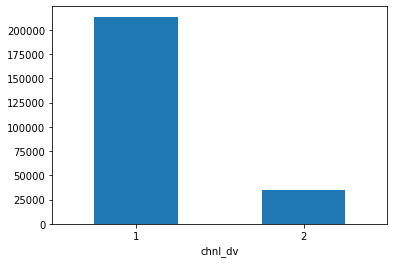

In [13]:
df13.groupby('chnl_dv')['cust'].count().plot.bar(rot=0)
plt.show()

In [14]:
df12 = pd.merge(df1, df2, on='cust', how='inner')

In [15]:
df132 = pd.concat([df13, df12])
df132

,cust,ma_fem_dv,ages,zon_hlv,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,pd_c,buy_ct
0,M000034966,여성,40대,Z07,21103009D010634285,D01,D011011,1,20211030,20211030.0,9,3900.0,NaN,NaN
1,M000059535,여성,30대,Z12,21030317C012142421,C01,C010085,2,20210303,20210305.0,17,46000.0,NaN,NaN
2,M000136117,여성,30대,Z11,21062011D015519200,D01,D010062,1,20210620,20210620.0,11,17900.0,NaN,NaN
3,M000136117,여성,30대,Z11,21112110D014221594,D01,D010062,1,20211121,20211121.0,10,20500.0,NaN,NaN
4,M000136117,여성,30대,Z11,21080711D010617976,D01,D010062,1,20210807,20210807.0,11,14300.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M999962961,여성,50대,Z17,A05001012161,A05,A050039,1,20210313,NaN,20,599000.0,PD0541,1.0
4381739,M999962961,여성,50대,Z17,E06002810292,A06,NaN,2,20210113,NaN,18,129000.0,PD0959,1.0
4381740,M999962961,여성,50대,Z17,E06004609359,A06,NaN,2,20210122,NaN,14,34300.0,PD0954,1.0
4381741,M999962961,여성,50대,Z17,E06025413888,A06,NaN,2,20210406,NaN,17,89000.0,PD0967,1.0


In [16]:
df132_ages = pd.DataFrame(df132.groupby('ages')['cust'].count())
df132_ages

,cust
ages,
20대,285966
30대,1097859
40대,1935961
50대,943890
60대,276113
70대,90258


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0, flags=flags)


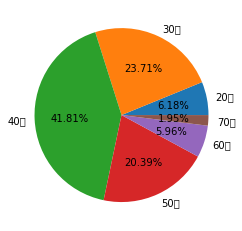

In [17]:
import matplotlib.pyplot as plt
plt.pie(df132_ages['cust'], labels=df132_ages.index, autopct='%1.2f%%')
plt.show()

In [18]:
df3_seasons = pd.read_csv('p3_grade_seasons.csv', sep=',')
df3_seasons = df3_seasons.drop(['Unnamed: 0', 'rct_no'], axis=1)
df3_seasons

,cust,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,grade
0,M839993508,201,B010012,1,4,4,12,60000,0
1,M839993508,201,B010012,1,4,4,10,17100,0
2,M839993508,201,B010012,1,1,1,12,136500,0
3,M839993508,201,B010012,1,4,4,10,34200,0
4,M839993508,401,D010614,1,4,4,9,2500,0
...,...,...,...,...,...,...,...,...,...
248299,M321652667,401,D010143,1,4,4,13,16400,0
248300,M321652667,402,D020245,1,4,4,12,9100,0
248301,M736929241,301,C010011,2,4,4,22,26000,0
248302,M040608978,302,C020002,1,4,4,16,27500,0


In [19]:
df3_seasons.groupby('grade')['cust'].count()

grade
0    246170
1      1447
2       515
3       109
4        22
5        41
Name: cust, dtype: int64

In [20]:
df3_seasons.groupby('vst_dt')['cust'].count()

vst_dt
1    54069
2    60344
3    69843
4    64048
Name: cust, dtype: int64

In [21]:
df3_seasons.pivot_table(values='cust', index='grade', columns='vst_dt', aggfunc='count', fill_value=0)

vst_dt,1,2,3,4
grade,,,,
0,53560,59793,69278,63539
1,365,356,385,341
2,102,146,135,132
3,25,35,27,22
4,1,7,7,7
5,16,7,11,7


In [22]:
df3_seasons.pivot_table(values='cust', index='cop_c', columns='vst_dt', aggfunc='count', fill_value=0)

vst_dt,1,2,3,4
cop_c,,,,
201,1825,1919,2237,2122
301,9286,9154,16334,13549
302,6351,7548,7515,8844
401,25180,28334,31368,27350
402,9881,11574,10694,10985
501,1546,1815,1695,1198
